# Stock Tweets for Sentiment Analysis and Prediction

In [2]:
!pip install textblob

# Required Libraries

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a Pandas dataframe:

In [6]:
df = pd.read_csv('/Users/mdabusufian/Downloads/stock_tweets.csv')

In [7]:
import pandas as pd

df = pd.read_csv('/Users/mdabusufian/Downloads/stock_tweets.csv')
print(df.columns)
df.head()

Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


# Data Cleaning 
# #Clean the text data by removing any special characters, numbers, and stopwords:

In [9]:
stop_words = stopwords.words('english')
df['clean_text'] = df['Tweet'].apply(lambda x: " ".join(re.findall('[a-zA-Z]+', x)).lower())
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))


In [10]:
from textblob import TextBlob

# create a new column 'polarity' in the dataframe
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# create a new column 'sentiment' based on the 'polarity' column
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')


In [ ]:
# Convert the text data into numerical features using CountVectorizer:

In [12]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']


# Split the data into training and testing sets:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# AI Model

# Train a logistic regression model on the training set:

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

# Evaluation Metric

In [17]:
#Test the model on the testing set and evaluate its accuracy and classification report:

In [18]:
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:\n", cr)


Accuracy: 0.9538337768426264
Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.87      0.90      2691
     neutral       0.95      0.98      0.96      6052
    positive       0.97      0.96      0.96      7416

    accuracy                           0.95     16159
   macro avg       0.95      0.94      0.94     16159
weighted avg       0.95      0.95      0.95     16159



# Result  Visualisation

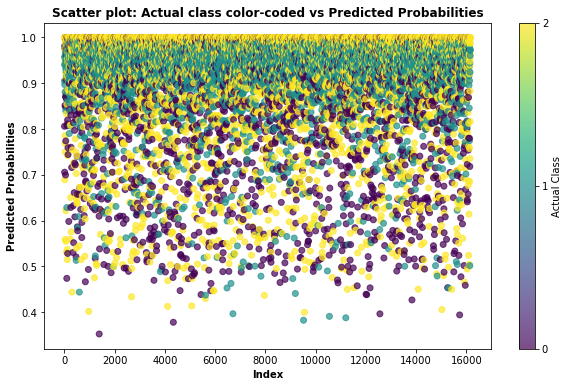

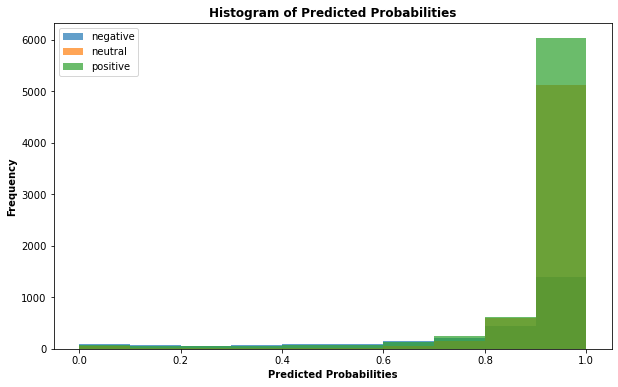

In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Assume y_pred_proba are the probabilities of the positive class
y_pred_proba = lr.predict_proba(X_test)

# Scatter plot of actual vs predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), np.max(y_pred_proba, axis=1), c=y_test_encoded, cmap='viridis', alpha=0.7)
plt.xlabel('Index', fontweight='bold')
plt.ylabel('Predicted Probabilities', fontweight='bold')
plt.title('Scatter plot: Actual class color-coded vs Predicted Probabilities', fontweight='bold')
plt.colorbar(ticks=[0, 1, 2], label='Actual Class')
plt.show()

# Histogram of predicted probabilities for all classes
plt.figure(figsize=(10, 6))
for i, class_label in enumerate(le.classes_):
    plt.hist(y_pred_proba[y_test==class_label][:, i], bins=10, label=class_label, alpha=0.7)
plt.xlabel('Predicted Probabilities', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Predicted Probabilities', fontweight='bold')
plt.legend()
plt.show()


# Visualise the model Performance
# #For checking Confusing positive tweets with neutral or negative tweets and vice versa.

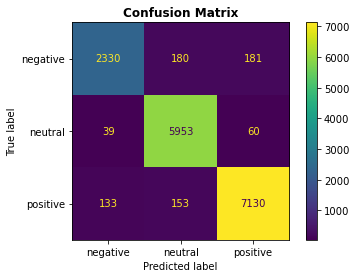

In [21]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(lr, X_test, y_test)
plt.title('Confusion Matrix', fontweight='bold')
plt.show()


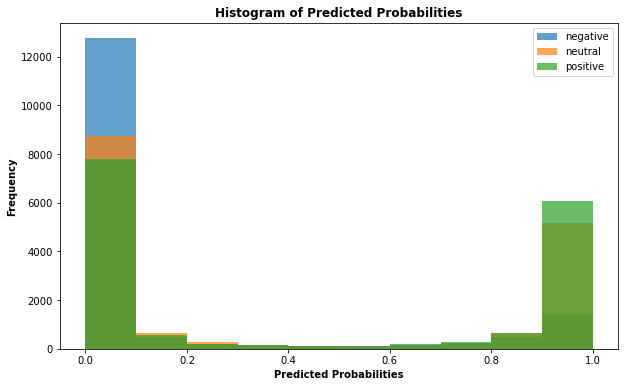

In [22]:
y_pred_proba = lr.predict_proba(X_test)

plt.figure(figsize=(10, 6))
for i, class_label in enumerate(lr.classes_):
    plt.hist(y_pred_proba[:, i], bins=10, label=class_label, alpha=0.7)
plt.xlabel('Predicted Probabilities', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Predicted Probabilities', fontweight='bold')
plt.legend()
plt.show()


In [25]:
coefficients = lr.coef_

print("Shape of coefficients:", coefficients.shape)
print("Number of features:", len(df.columns))


Shape of coefficients: (3, 76088)
Number of features: 7


# Precision-Recall Curves

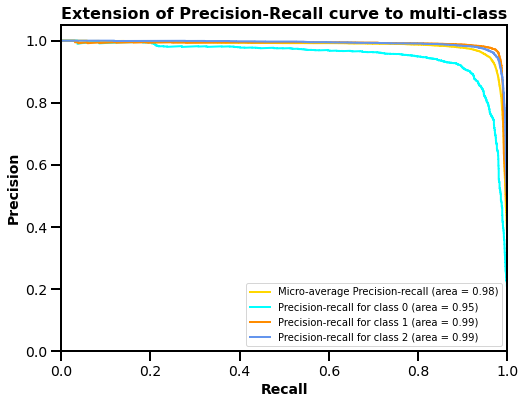

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from itertools import cycle

import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.labelweight'] = 'bold'


y_score = lr.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

plt.figure(figsize=(8, 6))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('Micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(3), cycle(['aqua', 'darkorange', 'cornflowerblue'])):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Extension of Precision-Recall curve to multi-class', fontsize=16, fontweight='bold')
plt.legend(lines, labels, loc='lower right')
plt.show()


# ROC Curves: to see the changes the classification threshold. 

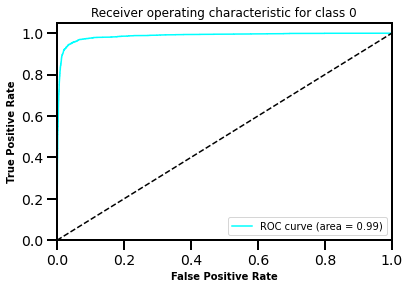

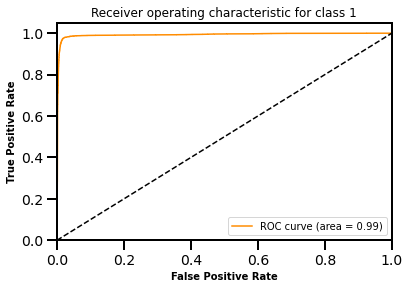

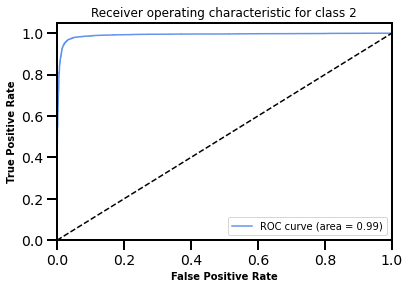

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.labelweight'] = 'bold'

y_score = lr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, color in zip(range(3), cycle(['aqua', 'darkorange', 'cornflowerblue'])):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {0}'.format(i))
    plt.legend(loc="lower right")
    plt.show()
